In [1]:
#import matplotlib
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_train.csv", encoding = "ISO-8859-1", error_bad_lines=False)



In [2]:
#Create missing value report
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row:")
print (df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
passengerId      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

Missing values per row:
0    1
1    0
2    1
3    0
4    1
dtype: int64


In [3]:
#Explore values of age 
df['age'].mean()

29.69911764705882

In [4]:
df['age'].median()

28.0

In [5]:
df['age'].mode()

0    24.0
dtype: float64

In [6]:
#Impute null age with mode
df['age'].fillna(df['age'].median(), inplace=True)

In [7]:
#Impute null cabin with dummy values 
df['cabin'].fillna('XX', inplace=True)

In [8]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [9]:
#Impute embarked with 'S'
df['embarked'].fillna('S', inplace=True)

In [10]:
#Rerun Null report
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
passengerId    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64


In [11]:
#Convert all data types to numeric for SCikit

from sklearn.preprocessing import LabelEncoder
result = 'survived'
predictors = [x for x in df.columns if x not in [result]]
#var_mod = ['pclass', 'sex', 'age', 'CabinID', 'embarkedPort', 'relations', 'FareClass', 'survived']
var_mod = predictors
le = LabelEncoder()
for i in var_mod:
    if df[i].dtypes=='object':
        df[i] = le.fit_transform(df[i])
df.dtypes

passengerId      int64
survived         int64
pclass           int64
name             int64
sex              int64
age            float64
sibsp            int64
parch            int64
ticket           int64
fare           float64
cabin            int64
embarked         int64
dtype: object

In [12]:
#Feature Importance Report with Random Forest for dimasionality test


In [13]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [14]:
#define a function which will help us create different models and perform cross-validation.

def modelfit(alg, dtrain, predictors, outcome, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
  
    #dtrain[outcome] = label_binarize(dtrain[outcome], classes=[0, 1])
    alg.fit(dtrain[predictors], dtrain[outcome])
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

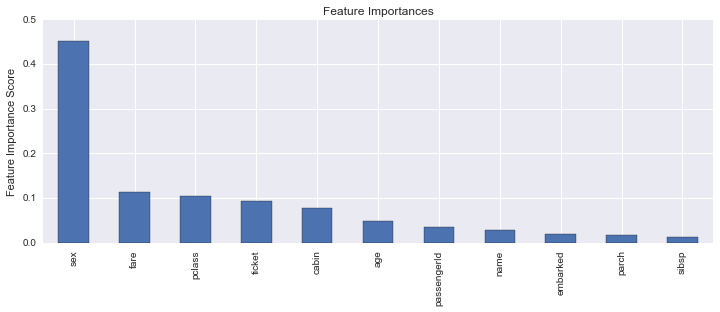

In [15]:
#Using Random Forest to generate Feature Importance Report
rfc0 = RandomForestClassifier(n_estimators =500,  oob_score = "TRUE", n_jobs = -1,
        random_state =10, max_features = "sqrt", max_depth = 8, min_samples_split = 20, min_samples_leaf = 20) 
outcome_var = 'survived'
predictor_var = [x for x in df.columns if x not in ['survived']]
modelfit(rfc0, df, predictor_var ,outcome_var)

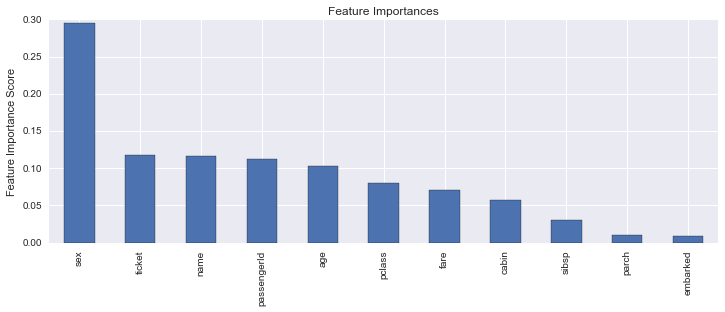

In [16]:
#Use Decision Tree Classifier 
dtc0 = tree.DecisionTreeClassifier(criterion='gini')
outcome_var = 'survived'
predictor_var = [x for x in df.columns if x not in ['survived']]
modelfit(dtc0, df, predictor_var ,outcome_var)